**Цель блокнота - научить обрабатывать табличные данные в pandas**


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import os

try:
    os.chdir("./data/")
except FileNotFoundError:
    pass


# 1 - Индексы


In [12]:
sales = pd.read_excel("regional_sales.xlsx", index_col=0)
sales


,Moscow,Irkutsk,Rostov,Vladivostok,Perm,Minsk
Date,,,,,,
2015-01-01,400000.000000,120000,250000.000000,0,10000.000000,25000.000000
2015-01-02,0.000000,0,0.000000,0,0.000000,0.000000
2015-01-03,370000.000000,130000,230000.000000,2000,7000.000000,20000.000000
2015-01-04,366666.666667,130000,206666.666667,3000,7666.666667,23333.333333
2015-01-05,351666.666667,135000,196666.666667,4000,6166.666667,20833.333333
...,...,...,...,...,...,...
2015-03-04,224166.666667,177500,111666.666667,12500,10559.523810,0.000000
2015-03-05,220416.666667,178750,109166.666667,12750,10263.888889,0.000000
2015-03-06,216666.666667,180000,106666.666667,13000,9968.253968,0.000000


Запрос столбца по названию


In [13]:
sales["Perm"]


Date
2015-01-01    10000.000000
2015-01-02        0.000000
2015-01-03     7000.000000
2015-01-04     7666.666667
2015-01-05     6166.666667
                  ...     
2015-03-04    10559.523810
2015-03-05    10263.888889
2015-03-06     9968.253968
2015-03-07     9672.619048
2015-03-08     9376.984127
Name: Perm, Length: 67, dtype: float64

По индексу


In [14]:
sales[sales.columns[-2]]


Date
2015-01-01    10000.000000
2015-01-02        0.000000
2015-01-03     7000.000000
2015-01-04     7666.666667
2015-01-05     6166.666667
                  ...     
2015-03-04    10559.523810
2015-03-05    10263.888889
2015-03-06     9968.253968
2015-03-07     9672.619048
2015-03-08     9376.984127
Name: Perm, Length: 67, dtype: float64

Одновременный вывод двух и более столбцов


In [15]:
sales[["Perm", "Moscow", "Irkutsk"]]


,Perm,Moscow,Irkutsk
Date,,,
2015-01-01,10000.000000,400000.000000,120000
2015-01-02,0.000000,0.000000,0
2015-01-03,7000.000000,370000.000000,130000
2015-01-04,7666.666667,366666.666667,130000
2015-01-05,6166.666667,351666.666667,135000
...,...,...,...
2015-03-04,10559.523810,224166.666667,177500
2015-03-05,10263.888889,220416.666667,178750
2015-03-06,9968.253968,216666.666667,180000


Вывод всех столбцов, кроме


In [16]:
sales.loc[:, sales.columns != "Minsk"].head()  # type: ignore


,Moscow,Irkutsk,Rostov,Vladivostok,Perm
Date,,,,,
2015-01-01,400000.000000,120000,250000.000000,0,10000.000000
2015-01-02,0.000000,0,0.000000,0,0.000000
2015-01-03,370000.000000,130000,230000.000000,2000,7000.000000
2015-01-04,366666.666667,130000,206666.666667,3000,7666.666667
2015-01-05,351666.666667,135000,196666.666667,4000,6166.666667


Вывод строк по названию ряда


In [17]:
sales.loc["2015-01-03"]


Moscow         370000.0
Irkutsk        130000.0
Rostov         230000.0
Vladivostok      2000.0
Perm             7000.0
Minsk           20000.0
Name: 2015-01-03 00:00:00, dtype: float64

Вывод всех строк, кроме


In [18]:
sales.loc[sales.index != "2015-01-02"].head()


,Moscow,Irkutsk,Rostov,Vladivostok,Perm,Minsk
Date,,,,,,
2015-01-01,400000.000000,120000,250000.000000,0,10000.000000,25000.000000
2015-01-03,370000.000000,130000,230000.000000,2000,7000.000000,20000.000000
2015-01-04,366666.666667,130000,206666.666667,3000,7666.666667,23333.333333
2015-01-05,351666.666667,135000,196666.666667,4000,6166.666667,20833.333333
2015-01-06,336666.666667,140000,186666.666667,5000,4666.666667,18333.333333


Вывод строки по индексу


In [19]:
sales.iloc[-1]


Moscow         209166.666667
Irkutsk        182500.000000
Rostov         101666.666667
Vladivostok     13500.000000
Perm             9376.984127
Minsk               0.000000
Name: 2015-03-08 00:00:00, dtype: float64

Выведем несколько строк


In [20]:
sales[15:20]


,Moscow,Irkutsk,Rostov,Vladivostok,Perm,Minsk
Date,,,,,,
2015-01-16,0.000000,0,0.000000,0,0.000000,0.000000
2015-01-17,0.000000,0,0.000000,0,0.000000,0.000000
2015-01-18,370000.000000,130000,230000.000000,2000,7000.000000,20000.000000
2015-01-19,366666.666667,130000,206666.666667,3000,7666.666667,23333.333333
2015-01-20,351666.666667,135000,196666.666667,4000,6166.666667,20833.333333


Отразим каждую вторую строку


In [21]:
sales[::2].head()


,Moscow,Irkutsk,Rostov,Vladivostok,Perm,Minsk
Date,,,,,,
2015-01-01,400000.000000,120000,250000.000000,0,10000.000000,25000.000000
2015-01-03,370000.000000,130000,230000.000000,2000,7000.000000,20000.000000
2015-01-05,351666.666667,135000,196666.666667,4000,6166.666667,20833.333333
2015-01-07,321666.666667,145000,176666.666667,6000,3166.666667,15833.333333
2015-01-09,291666.666667,155000,156666.666667,8000,23333.333333,10833.333333


Интервал по названию ряда


In [22]:
sales.loc["2015-01-03":"2015-01-10"]


,Moscow,Irkutsk,Rostov,Vladivostok,Perm,Minsk
Date,,,,,,
2015-01-03,370000.000000,130000,230000.000000,2000,7000.000000,20000.000000
2015-01-04,366666.666667,130000,206666.666667,3000,7666.666667,23333.333333
2015-01-05,351666.666667,135000,196666.666667,4000,6166.666667,20833.333333
2015-01-06,336666.666667,140000,186666.666667,5000,4666.666667,18333.333333
2015-01-07,321666.666667,145000,176666.666667,6000,3166.666667,15833.333333
2015-01-08,306666.666667,150000,166666.666667,7000,20000.000000,13333.333333
2015-01-09,291666.666667,155000,156666.666667,8000,23333.333333,10833.333333
2015-01-10,276666.666667,160000,146666.666667,9000,20833.333333,8333.333333


Отдельные строки списком


In [23]:
sales.loc[["2015-01-03", "2015-01-07"]]


,Moscow,Irkutsk,Rostov,Vladivostok,Perm,Minsk
Date,,,,,,
2015-01-03,370000.000000,130000,230000.000000,2000,7000.000000,20000.000000
2015-01-07,321666.666667,145000,176666.666667,6000,3166.666667,15833.333333


# 2 - Числовые значения в таблицах


Удовлетворение условию по каждой ячейке


In [24]:
sales.head()


,Moscow,Irkutsk,Rostov,Vladivostok,Perm,Minsk
Date,,,,,,
2015-01-01,400000.000000,120000,250000.000000,0,10000.000000,25000.000000
2015-01-02,0.000000,0,0.000000,0,0.000000,0.000000
2015-01-03,370000.000000,130000,230000.000000,2000,7000.000000,20000.000000
2015-01-04,366666.666667,130000,206666.666667,3000,7666.666667,23333.333333
2015-01-05,351666.666667,135000,196666.666667,4000,6166.666667,20833.333333


In [25]:
sales > 200_000


,Moscow,Irkutsk,Rostov,Vladivostok,Perm,Minsk
Date,,,,,,
2015-01-01,True,False,True,False,False,False
2015-01-02,False,False,False,False,False,False
2015-01-03,True,False,True,False,False,False
2015-01-04,True,False,True,False,False,False
2015-01-05,True,False,False,False,False,False
...,...,...,...,...,...,...
2015-03-04,True,False,False,False,False,False
2015-03-05,True,False,False,False,False,False
2015-03-06,True,False,False,False,False,False


Поиск рядов, где есть хотя бы одно 0 значение


In [26]:
sales


,Moscow,Irkutsk,Rostov,Vladivostok,Perm,Minsk
Date,,,,,,
2015-01-01,400000.000000,120000,250000.000000,0,10000.000000,25000.000000
2015-01-02,0.000000,0,0.000000,0,0.000000,0.000000
2015-01-03,370000.000000,130000,230000.000000,2000,7000.000000,20000.000000
2015-01-04,366666.666667,130000,206666.666667,3000,7666.666667,23333.333333
2015-01-05,351666.666667,135000,196666.666667,4000,6166.666667,20833.333333
...,...,...,...,...,...,...
2015-03-04,224166.666667,177500,111666.666667,12500,10559.523810,0.000000
2015-03-05,220416.666667,178750,109166.666667,12750,10263.888889,0.000000
2015-03-06,216666.666667,180000,106666.666667,13000,9968.253968,0.000000


In [27]:
sales[(sales == 0).any(axis=1)]


,Moscow,Irkutsk,Rostov,Vladivostok,Perm,Minsk
Date,,,,,,
2015-01-01,400000.000000,120000,250000.000000,0,10000.000000,25000.0
2015-01-02,0.000000,0,0.000000,0,0.000000,0.0
2015-01-14,0.000000,0,0.000000,0,0.000000,0.0
2015-01-15,0.000000,0,0.000000,0,0.000000,0.0
2015-01-16,0.000000,0,0.000000,0,0.000000,0.0
2015-01-17,0.000000,0,0.000000,0,0.000000,0.0
2015-03-04,224166.666667,177500,111666.666667,12500,10559.523810,0.0
2015-03-05,220416.666667,178750,109166.666667,12750,10263.888889,0.0
2015-03-06,216666.666667,180000,106666.666667,13000,9968.253968,0.0


Создаем новую переменную, на основе отфильтрованных данных


In [28]:
sales > 150_000


,Moscow,Irkutsk,Rostov,Vladivostok,Perm,Minsk
Date,,,,,,
2015-01-01,True,False,True,False,False,False
2015-01-02,False,False,False,False,False,False
2015-01-03,True,False,True,False,False,False
2015-01-04,True,False,True,False,False,False
2015-01-05,True,False,True,False,False,False
...,...,...,...,...,...,...
2015-03-04,True,True,False,False,False,False
2015-03-05,True,True,False,False,False,False
2015-03-06,True,True,False,False,False,False


In [29]:
sales


,Moscow,Irkutsk,Rostov,Vladivostok,Perm,Minsk
Date,,,,,,
2015-01-01,400000.000000,120000,250000.000000,0,10000.000000,25000.000000
2015-01-02,0.000000,0,0.000000,0,0.000000,0.000000
2015-01-03,370000.000000,130000,230000.000000,2000,7000.000000,20000.000000
2015-01-04,366666.666667,130000,206666.666667,3000,7666.666667,23333.333333
2015-01-05,351666.666667,135000,196666.666667,4000,6166.666667,20833.333333
...,...,...,...,...,...,...
2015-03-04,224166.666667,177500,111666.666667,12500,10559.523810,0.000000
2015-03-05,220416.666667,178750,109166.666667,12750,10263.888889,0.000000
2015-03-06,216666.666667,180000,106666.666667,13000,9968.253968,0.000000


In [30]:
high_sales = sales[sales > 150_000]
high_sales


,Moscow,Irkutsk,Rostov,Vladivostok,Perm,Minsk
Date,,,,,,
2015-01-01,400000.000000,NaN,250000.000000,NaN,NaN,NaN
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-03,370000.000000,NaN,230000.000000,NaN,NaN,NaN
2015-01-04,366666.666667,NaN,206666.666667,NaN,NaN,NaN
2015-01-05,351666.666667,NaN,196666.666667,NaN,NaN,NaN
...,...,...,...,...,...,...
2015-03-04,224166.666667,177500.0,NaN,NaN,NaN,NaN
2015-03-05,220416.666667,178750.0,NaN,NaN,NaN,NaN
2015-03-06,216666.666667,180000.0,NaN,NaN,NaN,NaN


Новая переменная, где буду ряда, в которых значение отдельного ряда превышает х


In [31]:
high_moscow_sales = sales[sales["Moscow"] > 350_000]
high_moscow_sales


,Moscow,Irkutsk,Rostov,Vladivostok,Perm,Minsk
Date,,,,,,
2015-01-01,400000.000000,120000,250000.000000,0,10000.000000,25000.000000
2015-01-03,370000.000000,130000,230000.000000,2000,7000.000000,20000.000000
2015-01-04,366666.666667,130000,206666.666667,3000,7666.666667,23333.333333
2015-01-05,351666.666667,135000,196666.666667,4000,6166.666667,20833.333333
2015-01-18,370000.000000,130000,230000.000000,2000,7000.000000,20000.000000
2015-01-19,366666.666667,130000,206666.666667,3000,7666.666667,23333.333333
2015-01-20,351666.666667,135000,196666.666667,4000,6166.666667,20833.333333
2015-01-22,370000.000000,130000,230000.000000,2000,7000.000000,20000.000000
2015-02-10,351666.666667,135000,196666.666667,4000,6166.666667,20833.333333


Выполнение множества условий


In [32]:
sales_with_and_condition = sales[
    (sales["Irkutsk"] > 130_000) & (sales["Vladivostok"] > 0)
]
sales_with_and_condition


,Moscow,Irkutsk,Rostov,Vladivostok,Perm,Minsk
Date,,,,,,
2015-01-05,351666.666667,135000,196666.666667,4000,6166.666667,20833.333333
2015-01-06,336666.666667,140000,186666.666667,5000,4666.666667,18333.333333
2015-01-07,321666.666667,145000,176666.666667,6000,3166.666667,15833.333333
2015-01-08,306666.666667,150000,166666.666667,7000,20000.000000,13333.333333
2015-01-09,291666.666667,155000,156666.666667,8000,23333.333333,10833.333333
2015-01-10,276666.666667,160000,146666.666667,9000,20833.333333,8333.333333
2015-01-11,261666.666667,165000,136666.666667,10000,18333.333333,5833.333333
2015-01-12,246666.666667,170000,126666.666667,11000,15833.333333,3333.333333
2015-01-13,231666.666667,175000,116666.666667,12000,15833.333333,833.333333


Выполнение одного из условий


In [33]:
sales_with_or_condition = sales[
    (sales["Irkutsk"] > 130_000) | (sales["Vladivostok"] != 0)
]
sales_with_or_condition


,Moscow,Irkutsk,Rostov,Vladivostok,Perm,Minsk
Date,,,,,,
2015-01-03,370000.000000,130000,230000.000000,2000,7000.000000,20000.000000
2015-01-04,366666.666667,130000,206666.666667,3000,7666.666667,23333.333333
2015-01-05,351666.666667,135000,196666.666667,4000,6166.666667,20833.333333
2015-01-06,336666.666667,140000,186666.666667,5000,4666.666667,18333.333333
2015-01-07,321666.666667,145000,176666.666667,6000,3166.666667,15833.333333
...,...,...,...,...,...,...
2015-03-04,224166.666667,177500,111666.666667,12500,10559.523810,0.000000
2015-03-05,220416.666667,178750,109166.666667,12750,10263.888889,0.000000
2015-03-06,216666.666667,180000,106666.666667,13000,9968.253968,0.000000


**Поиск текстовых значений**


Загружаем файл с выгруженными сообщениями по форуму mfd


In [34]:
magnit = pd.read_csv("magnit_parsed.csv", sep="|", index_col="time")
magnit


,Unnamed: 0,user_rate,likes,text
time,,,,
26.03.2018 17:20,0,90,1,Решение совидира мега позитив! Проблема Магни ...
26.03.2018 17:21,1,-263,1,В чем позитив
26.03.2018 17:22,2,0,0,"Жеребцов ща по фарме -позитив, управлял Лентой..."
26.03.2018 17:23,3,91,0,Согласен про позитив. А ОСОБЫЙ позитив готовят...
26.03.2018 17:24,4,274,0,В списке лиц.
...,...,...,...,...
05.12.2017 16:22,217923,-12,0,че цена в потолок ушла?
05.12.2017 16:22,217924,3514,0,"23ий, просыпайся, в 0 выходим!! Поезд уходит, ..."
05.12.2017 16:24,217925,3514,1,"раньше дивы были к нг, а сейчас вообще не поня..."


Удалим лишний столбец


In [35]:
magnit.drop(magnit.columns[0], axis=1, inplace=True)
magnit


,user_rate,likes,text
time,,,
26.03.2018 17:20,90,1,Решение совидира мега позитив! Проблема Магни ...
26.03.2018 17:21,-263,1,В чем позитив
26.03.2018 17:22,0,0,"Жеребцов ща по фарме -позитив, управлял Лентой..."
26.03.2018 17:23,91,0,Согласен про позитив. А ОСОБЫЙ позитив готовят...
26.03.2018 17:24,274,0,В списке лиц.
...,...,...,...
05.12.2017 16:22,-12,0,че цена в потолок ушла?
05.12.2017 16:22,3514,0,"23ий, просыпайся, в 0 выходим!! Поезд уходит, ..."
05.12.2017 16:24,3514,1,"раньше дивы были к нг, а сейчас вообще не поня..."


Полный вывод текста в ячейках


In [36]:
pd.set_option("display.max_colwidth", None)


In [37]:
magnit


,user_rate,likes,text
time,,,
26.03.2018 17:20,90,1,"Решение совидира мега позитив! Проблема Магни в последние годы была твердолобость ГСН и не желание агрессивно расти! ВТБ супер усилил СД, Х5 кранты! Но ты шорти сильнее пожалуйста!"
26.03.2018 17:21,-263,1,В чем позитив
26.03.2018 17:22,0,0,"Жеребцов ща по фарме -позитив, управлял Лентой - позитив, а вот то что оба ритейлера ВТБшные, вот тут фиг поймёшь что это =)"
26.03.2018 17:23,91,0,Согласен про позитив. А ОСОБЫЙ позитив готовят после отчета за 1 квартал.
26.03.2018 17:24,274,0,В списке лиц.
...,...,...,...
05.12.2017 16:22,-12,0,че цена в потолок ушла?
05.12.2017 16:22,3514,0,"23ий, просыпайся, в 0 выходим!! Поезд уходит, следующая остановка 6500."
05.12.2017 16:24,3514,1,"раньше дивы были к нг, а сейчас вообще не понятно будут ли дивы, на сайте dohod дивы написаны 23 декабря, видимо как подарок 23ему."


Поиск по ключевому слову


In [38]:
magnit_positive = magnit[magnit["text"].str.contains("позитив", na=False)]
magnit_positive


,user_rate,likes,text
time,,,
26.03.2018 17:20,90,1,"Решение совидира мега позитив! Проблема Магни в последние годы была твердолобость ГСН и не желание агрессивно расти! ВТБ супер усилил СД, Х5 кранты! Но ты шорти сильнее пожалуйста!"
26.03.2018 17:21,-263,1,В чем позитив
26.03.2018 17:22,0,0,"Жеребцов ща по фарме -позитив, управлял Лентой - позитив, а вот то что оба ритейлера ВТБшные, вот тут фиг поймёшь что это =)"
26.03.2018 17:23,91,0,Согласен про позитив. А ОСОБЫЙ позитив готовят после отчета за 1 квартал.
27.03.2018 10:24,1926,0,"Как бы раньше, но это больше минус чем плюс... там могут нарешать, что типа подождём результатов за 1 полугодие и эффекта от ребрендинга, но не снимаем возможность выплат и выкупа... на этом пойдём вниз, а потом отчёт - если позитивный, то вверх и просто компенсация падения после собрания «с посмотреть что будет, а потом решить» а вот если и отчёт будет - кака, то едем под 4000 и сидим там аж до июля ... ребятки, кто микролонгов набрал - удс свой блюдите не даст ВТБ тут ни мишкам ни лангустам заработать ... долго ещё не даст..."
...,...,...,...
01.12.2017 21:53,1107,0,"Дорогие лонгусты! Забаньте всех тех , кто пишет что в шорте магнита или ждет его ниже. Пусть в ваших экранах всегда благоухает позитив и покупка в лонг, тех кто на все плечи добавляйте в друзья! Так вы быстрей придете к успеху! 50-т грамм за ваше здоровье!"
03.12.2017 21:17,2053,1,"Всем привет. Небольшой позитив для ритейла. Всемирный банк улучшил прогноз по экономике РФ Всемирный банк улучшил прогноз среднесрочных темпов роста российской экономики. В 2017 и 2018 годах ожидается рост ВВП РФ на 1,7%, в 2019 году Всемирный банк ждет роста экономики на 1,8%. В мае банк прогнозировал рост на 1,3% в 2017 году, в 2018 и 2019 гг. – на 1,4%. Пересмотр прогноза связан с несколько более уверенным, чем ожидалось, восстановлением внутреннего спроса и ростом экспорта. https://www.finam.ru/analysis/newsitem/vsemirny... Всемирный банк ожидает снижения уровня бедности в России Всемирный банк ожидает снижения уровня бедности в РФ в 2017 году в рамках базового сценария до 12, 9%, в 2018 и 2019 годы - до 12, 6% и 12,2%, соответственно. Об этом рассказал ведущий экономист РФ по России Апурва Санги, представляя очередной, 38-й доклад по экономике России. https://www.finam.ru/analysis/newsitem/vsemirny..."
04.12.2017 00:13,90,0,"Если я правильно понимаю, то у магнита сейчас инорезов в акционерах больше чем в любой другой Росс компании. Кстати что там тянуть всеми силами. Одна позитивная новость и акции развернутся. Думаю что безусловно что то имеется"


Поиск по тексту с условием по числовому ряду


In [39]:
magnit_positive_and_likes = magnit[
    (magnit["text"].str.contains("позитив", na=False)) & (magnit["likes"] != 0)
]
magnit_positive_and_likes


,user_rate,likes,text
time,,,
26.03.2018 17:20,90,1,"Решение совидира мега позитив! Проблема Магни в последние годы была твердолобость ГСН и не желание агрессивно расти! ВТБ супер усилил СД, Х5 кранты! Но ты шорти сильнее пожалуйста!"
26.03.2018 17:21,-263,1,В чем позитив
27.03.2018 21:38,20K,1,"Магнит: отчетность по МСФО выявила существенный рост уровня запасов, из-за чего FCF оказался отрицательным в 2017, впервые с 2013 (MGNT RX; Пересмотр) Уровни запасов выросли на 20.2%, достигнув исторических максимумов по обороту - 70.6 дней из-за: 1) увеличившейся доли косметической продукции, которая может храниться более длительное время, 2) затоваривания, связанного с покупкой товаров по промо-акциям, и 3) стремительной экспансии в регионах. Финансовая отчетность показала, что чистый оборотный капитал вырос с 2% выручки в 2013 до 6.1% в 2017, требуя дополнительных инвестиций в 46.6 млрд руб. в оборотный капитал. В отличие от других публичных ритейлеров, ухудшение циклов оборотного капитала у Магнита преимущественно связано с высоким уровнем запасов, а не с более коротким периодом погашения кредиторской задолженности. Наше мнение. Мы считаем результаты негативными. Необычная для отрасли политика оборотного капитала Магнита, которая предполагает быстрый оборот кредиторской задолженности, чтобы добиться более выгодных условий поставок, привела к существенному росту чистого оборотного капитала Магнита. С другой стороны, X5 и Лента демонстрировали отрицательный или нейтральные циклы конверсии наличности. Хотя мы полагаем, что политика в отношении оборотного капитала может стать одним из ключевых направлений в обновленной стратегии, отсутствие видимости в отношении изменений стратегии и отсутствие позитивных катализаторов в течение следующих 6 месяцев будут продолжать оказывать давление на динамику акций в краткосрочной перспективе."
29.03.2018 12:01,1109,2,Пугают меня эти позитивные речи на ветке
05.04.2018 13:10,1926,1,"Все же считаю что сейчас совершено адекватная цена на ларёк... будет позитив пойдём на 5200 , негативи пойдём 4000 щупать ..."
...,...,...,...
28.11.2017 22:59,96,1,"ну сократят они позы 30 ноября,стопы и мк собьют,в райке так было,и как только фонды нахлобучили на исключении из индекса,поперли новости позитивные и отросла она от 80 до 120 за неделю,насколько помню. здесь будет тоже самое,иначе какой смысл было так бумагу топить,или вы считаете,что объемы слива реальны?"
01.12.2017 19:08,3181,1,"нашёл по нашей теме Вопрос-ответ на сайте БКС Лобакова Мария 30.11.2017 16:35 портфель аэрофлот по 164,магнит по 7627 лонги..грустно,к середине 2018 выйду в 0?и почему префы татнефть даже не двигаются толком после хорошей отчетности.. Константин Карпов эксперт БКС Экспресс 01.12.2017 13:28 У магнита есть шансы на 7300, уверенность высокая. Возможно даже 8000. По аэрофлоту взгляд не очень позитивный, дивиденды под угрозой. Лучше пробовать избавляться при отскоке на 160-165. Хотя сильный уровень, безусловно 180 руб. Татнефть перекуплена. Там было еще изменение веса в MSCI. Пока бумагу лучше не трогать."
01.12.2017 21:46,1093,1,Ждём новогодних скидок на магнит. Процентов 20 от текущих. Галицкий продал акцульки за 6200 с обязательством обратного выкупа. Логичнее если он цену продавит до 5000 и там откупиться свои чудо бумаги. Профит больше 1000 рублей за акцию. Поэтому позитивных новостей не ждите. Первая новость будет отмена див. Да попали вы здесь. Жаль мне вас


Список строк с заданным количеством лайков


In [40]:
magnit.loc[magnit.likes == 10]


,user_rate,likes,text
time,,,
21.08.2018 20:18,87K,10,МОЙ прогноз от 16 числа сбылся.....Где сто плюсов????
06.09.2018 22:23,22K,10,"Обсуждение в сенате закончилось. Основные тезисы: 1. Цель США — сменить ВВП и его ближайших соратников. В этом плане санкции против Сбера не имеют большого смысла. С Грефом лучше сотрудничать. 2. У Макфола, бывшего посла США в РФ, есть список 10 ближайших к Путину олигархов, на которых надо воздействовать. Дерипаска и Вексельберг в этот список не входят, санкции против них были ошибкой. Интересно, кто в этом списке? 3. Штаты хотят найти деньги Путина. Ещё надо отнять всю недвижку близких к Путину олигархов в США и Англии. Надо бить как лазерный хирург, точечно наказывая окружение Путина. 4. Российская экономика не имеет перспектив и живёт только за счёт сырья. При этом Россия готова вечно жить в условиях санкций. Пенсионная реформа подорвала доверие народа к Путину. 5. Нельзя вводить широкие санкции против России. В таком случае население РФ объединяется против США. 6. Санкции против РФ будут вредить США и партнёрам США. Но на Россию как-то нужно воздействовать. Санкции — самый эффективный способ мирной дипломатии. 7. Штаты перейдут от реактивных мер к проактивным. То есть вводить санкции будут не за прошлые провинности, а за будущие. 8. Трамп неэффективен в плане налаживания отношений с Россией. Он пытается построить с Путиным личные отношения, забывая о национальных интересах США. в общем...нормально"
27.09.2018 15:01,2069,10,"Ситуация такая, вчера почти все присутствующие миноры-фонды скинули аккуратно перед презой. Причём с планом откупит на 5-7% ниже. Разговор. Такой был на регистрации. Наумова очень плохой спикер для публичной компании, там нужен яркий лидер, чтобы рассказывать про космические корабли которые бороздят просторы космоса. Фоли - тоже скучный ирландец, со своими шуточками. Но дама по финансам четкая. Далее, что не так с ритейлом: 1. Нулевой LFL на пять лет в секторе. 2. Будут грызть друг друга пока не будет сверх игроков. А эта война - дорого. 3. Рост будет за счёт поглощение мелкой рыбешки. Почему с магазином все ок: 1. Крыша. Отжимать будут жестко и выгодно. 2. СТМы. Доля в 20% даст хороший приток прибыли. Важный момент долю стм они могут довести и до 40% со временем, если инфа про Линников не фейк. 3. Если они доведут маркет долю до 20%, то это будет кэш машина надолго. 4. ВТБ придётся загнать цену за 8000. 5. Категориальный менеджмент если правильно импоементируют тоже норм пойдёт. Что не так с магазином: 1. Мутнейшая сделка с СИА, причём фолли долго рассказывал про этот косяк IR. Им надо научиться быть не только клиенто ориентированными, но и инвестор-ориентированными. 2. Вся стратегия сделана через жопу BCG, с дженерик призывами и тучей булшит бинго. На вопрос одного мелкого фонда англосаксонского про конкретику Наумова поплыла. 3. Время. Новые форматы развернут только в 2019. Результаты будут только через год."
29.05.2019 18:18,238,10,"Спроси - за кой хер Дюнингу выдали столько акций, когда он ещё ничего не сделал - когда процент магазинов в собственности опять начнёт расти (сейчас тренд стремительно нисходящий) - почему не выходят в Беларусь и так вяло развиваются в Москве и Питере - почему не построят ""Магнит Опт"" возле крымского моста (чтоб снабжать оптовиков полуострова и при этом не подпадать под санкции) - почему эквайринг в Сбербанке а не в ВТБ (просто любопытно - что там со сгоревшим РЦ, какие сроки восстановления, как может повлиять на дивы за 2019 - когда будут активнее строить Магнит-семейные, сейчас их очень мало - нет ли у них мыслей купить Metro (загибающаяся сеть однако удобна тем что объекты в собственности и в хороших локациях Москвы, раз хотели Ленту, возможно есть смысл присмотреться к Metro) Это первое что на ум пришло)))))"
14.01.2020 11:22,27K,10,"** Аналитики JP Morgan делают все возможное, чтобы российские трейдеры не совершали ошибок ** JP Morgan больше всего на свете озабочен благосостоянием российских трейдеров ** Слушайте только JP Morgan и 

Поиск строки с конкретной фразой


In [41]:
magnit.loc[magnit.text == "В чем позитив"]


,user_rate,likes,text
time,,,
26.03.2018 17:21,-263,1,В чем позитив


# 3 - Прикладные операции с таблицами


In [42]:
sales


,Moscow,Irkutsk,Rostov,Vladivostok,Perm,Minsk
Date,,,,,,
2015-01-01,400000.000000,120000,250000.000000,0,10000.000000,25000.000000
2015-01-02,0.000000,0,0.000000,0,0.000000,0.000000
2015-01-03,370000.000000,130000,230000.000000,2000,7000.000000,20000.000000
2015-01-04,366666.666667,130000,206666.666667,3000,7666.666667,23333.333333
2015-01-05,351666.666667,135000,196666.666667,4000,6166.666667,20833.333333
...,...,...,...,...,...,...
2015-03-04,224166.666667,177500,111666.666667,12500,10559.523810,0.000000
2015-03-05,220416.666667,178750,109166.666667,12750,10263.888889,0.000000
2015-03-06,216666.666667,180000,106666.666667,13000,9968.253968,0.000000


Транспонирование таблицы


In [43]:
sales.T


Date,2015-01-01,2015-01-02,2015-01-03,2015-01-04,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-10,...,2015-02-27,2015-02-28,2015-03-01,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-07,2015-03-08
Moscow,400000.0,0.0,370000.0,366666.666667,351666.666667,336666.666667,321666.666667,306666.666667,291666.666667,276666.666667,...,242916.666667,239166.666667,235416.666667,231666.666667,227916.666667,224166.666667,220416.666667,216666.666667,212916.666667,209166.666667
Irkutsk,120000.0,0.0,130000.0,130000.000000,135000.000000,140000.000000,145000.000000,150000.000000,155000.000000,160000.000000,...,171250.000000,172500.000000,173750.000000,175000.000000,176250.000000,177500.000000,178750.000000,180000.000000,181250.000000,182500.000000
Rostov,250000.0,0.0,230000.0,206666.666667,196666.666667,186666.666667,176666.666667,166666.666667,156666.666667,146666.666667,...,124166.666667,121666.666667,119166.666667,116666.666667,114166.666667,111666.666667,109166.666667,106666.666667,104166.666667,101666.666667
Vladivostok,0.0,0.0,2000.0,3000.000000,4000.000000,5000.000000,6000.000000,7000.000000,8000.000000,9000.000000,...,11250.000000,11500.000000,11750.000000,12000.000000,12250.000000,12500.000000,12750.000000,13000.000000,13250.000000,13500.000000
Perm,10000.0,0.0,7000.0,7666.666667,6166.666667,4666.666667,3166.666667,20000.000000,23333.333333,20833.333333,...,12037.698413,11742.063492,11446.428571,11150.793651,10855.158730,10559.523810,10263.888889,9968.253968,9672.619048,9376.984127
Minsk,25000.0,0.0,20000.0,23333.333333,20833.333333,18333.333333,15833.333333,13333.333333,10833.333333,8333.333333,...,2708.333333,2083.333333,1458.333333,833.333333,208.333333,0.000000,0.000000,0.000000,0.000000,0.000000


**Арифметика с таблицами**


- - / \* \*\*


In [44]:
mm_sales = sales["Moscow"] + sales["Minsk"]
mm_sales


Date
2015-01-01    425000.000000
2015-01-02         0.000000
2015-01-03    390000.000000
2015-01-04    390000.000000
2015-01-05    372500.000000
                  ...      
2015-03-04    224166.666667
2015-03-05    220416.666667
2015-03-06    216666.666667
2015-03-07    212916.666667
2015-03-08    209166.666667
Length: 67, dtype: float64

In [45]:
sales2 = sales.copy()
sales2


,Moscow,Irkutsk,Rostov,Vladivostok,Perm,Minsk
Date,,,,,,
2015-01-01,400000.000000,120000,250000.000000,0,10000.000000,25000.000000
2015-01-02,0.000000,0,0.000000,0,0.000000,0.000000
2015-01-03,370000.000000,130000,230000.000000,2000,7000.000000,20000.000000
2015-01-04,366666.666667,130000,206666.666667,3000,7666.666667,23333.333333
2015-01-05,351666.666667,135000,196666.666667,4000,6166.666667,20833.333333
...,...,...,...,...,...,...
2015-03-04,224166.666667,177500,111666.666667,12500,10559.523810,0.000000
2015-03-05,220416.666667,178750,109166.666667,12750,10263.888889,0.000000
2015-03-06,216666.666667,180000,106666.666667,13000,9968.253968,0.000000


In [46]:
sales["moscow_daily_change"] = sales["Moscow"] - sales["Moscow"].shift(1)
sales


,Moscow,Irkutsk,Rostov,Vladivostok,Perm,Minsk,moscow_daily_change
Date,,,,,,,
2015-01-01,400000.000000,120000,250000.000000,0,10000.000000,25000.000000,NaN
2015-01-02,0.000000,0,0.000000,0,0.000000,0.000000,-400000.000000
2015-01-03,370000.000000,130000,230000.000000,2000,7000.000000,20000.000000,370000.000000
2015-01-04,366666.666667,130000,206666.666667,3000,7666.666667,23333.333333,-3333.333333
2015-01-05,351666.666667,135000,196666.666667,4000,6166.666667,20833.333333,-15000.000000
...,...,...,...,...,...,...,...
2015-03-04,224166.666667,177500,111666.666667,12500,10559.523810,0.000000,-3750.000000
2015-03-05,220416.666667,178750,109166.666667,12750,10263.888889,0.000000,-3750.000000
2015-03-06,216666.666667,180000,106666.666667,13000,9968.253968,0.000000,-3750.000000


In [47]:
sales


,Moscow,Irkutsk,Rostov,Vladivostok,Perm,Minsk,moscow_daily_change
Date,,,,,,,
2015-01-01,400000.000000,120000,250000.000000,0,10000.000000,25000.000000,NaN
2015-01-02,0.000000,0,0.000000,0,0.000000,0.000000,-400000.000000
2015-01-03,370000.000000,130000,230000.000000,2000,7000.000000,20000.000000,370000.000000
2015-01-04,366666.666667,130000,206666.666667,3000,7666.666667,23333.333333,-3333.333333
2015-01-05,351666.666667,135000,196666.666667,4000,6166.666667,20833.333333,-15000.000000
...,...,...,...,...,...,...,...
2015-03-04,224166.666667,177500,111666.666667,12500,10559.523810,0.000000,-3750.000000
2015-03-05,220416.666667,178750,109166.666667,12750,10263.888889,0.000000,-3750.000000
2015-03-06,216666.666667,180000,106666.666667,13000,9968.253968,0.000000,-3750.000000


**Статистика**


In [48]:
sales.mean(axis=0)


Moscow                 275226.368159
Irkutsk                141843.283582
Rostov                 152054.726368
Vladivostok              6917.910448
Perm                     8569.876806
Minsk                   10386.815920
moscow_daily_change     -2891.414141
dtype: float64

In [49]:
sales.mean(axis=1)


Date
2015-01-01    134166.666667
2015-01-02    -57142.857143
2015-01-03    161285.714286
2015-01-04    104857.142857
2015-01-05     99904.761905
                  ...      
2015-03-04     76091.836735
2015-03-05     75371.031746
2015-03-06     74650.226757
2015-03-07     73929.421769
2015-03-08     73208.616780
Length: 67, dtype: float64

In [50]:
sales.describe()


,Moscow,Irkutsk,Rostov,Vladivostok,Perm,Minsk,moscow_daily_change
count,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,66.000000
mean,275226.368159,141843.283582,152054.726368,6917.910448,8569.876806,10386.815920,-2891.414141
std,92213.226871,43556.842777,56288.835364,3873.332500,6400.680966,7789.670536,89191.585267
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-400000.000000
25%,244791.666667,137500.000000,125416.666667,4100.000000,3350.000000,3020.833333,-15000.000000
50%,302000.000000,149000.000000,166666.666667,6400.000000,7000.000000,11000.000000,-3750.000000
75%,336666.666667,166875.000000,191000.000000,10375.000000,12776.785714,17250.000000,-3000.000000
max,400000.000000,182500.000000,250000.000000,13500.000000,23333.333333,25000.000000,370000.000000


In [51]:
sales["Perm"].mean()


8569.87680644395

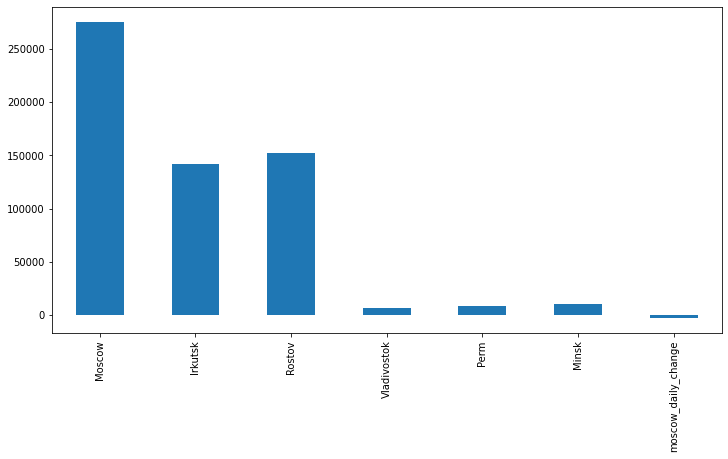


<Axes: >

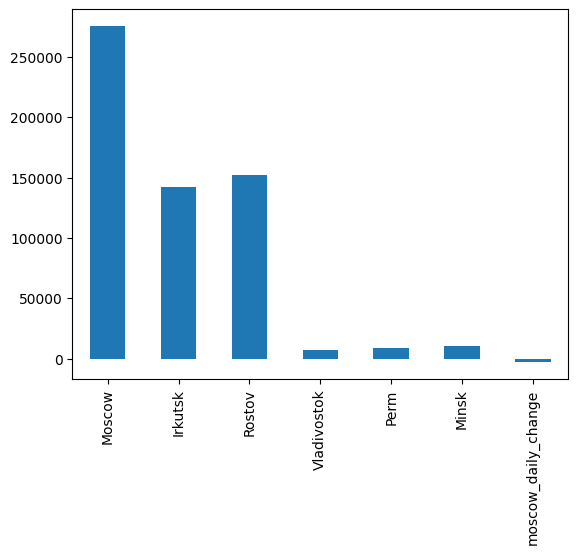

In [52]:
%matplotlib inline

sales.mean().plot.bar()

Условие для отдельного столбца


In [53]:
sales["moscow_daily_change"][sales["moscow_daily_change"] < 0] = 0
sales


C:\Users\drouni\AppData\Local\Temp\ipykernel_10940\885871281.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales["moscow_daily_change"][sales["moscow_daily_change"] < 0] = 0


,Moscow,Irkutsk,Rostov,Vladivostok,Perm,Minsk,moscow_daily_change
Date,,,,,,,
2015-01-01,400000.000000,120000,250000.000000,0,10000.000000,25000.000000,NaN
2015-01-02,0.000000,0,0.000000,0,0.000000,0.000000,0.0
2015-01-03,370000.000000,130000,230000.000000,2000,7000.000000,20000.000000,370000.0
2015-01-04,366666.666667,130000,206666.666667,3000,7666.666667,23333.333333,0.0
2015-01-05,351666.666667,135000,196666.666667,4000,6166.666667,20833.333333,0.0
...,...,...,...,...,...,...,...
2015-03-04,224166.666667,177500,111666.666667,12500,10559.523810,0.000000,0.0
2015-03-05,220416.666667,178750,109166.666667,12750,10263.888889,0.000000,0.0
2015-03-06,216666.666667,180000,106666.666667,13000,9968.253968,0.000000,0.0


Заполнение пустых значений


In [54]:
sales.replace(to_replace=0, method="ffill", inplace=True)
sales


,Moscow,Irkutsk,Rostov,Vladivostok,Perm,Minsk,moscow_daily_change
Date,,,,,,,
2015-01-01,400000.000000,120000,250000.000000,0,10000.000000,25000.000000,NaN
2015-01-02,400000.000000,120000,250000.000000,0,10000.000000,25000.000000,NaN
2015-01-03,370000.000000,130000,230000.000000,2000,7000.000000,20000.000000,370000.0
2015-01-04,366666.666667,130000,206666.666667,3000,7666.666667,23333.333333,370000.0
2015-01-05,351666.666667,135000,196666.666667,4000,6166.666667,20833.333333,370000.0
...,...,...,...,...,...,...,...
2015-03-04,224166.666667,177500,111666.666667,12500,10559.523810,208.333333,120000.0
2015-03-05,220416.666667,178750,109166.666667,12750,10263.888889,208.333333,120000.0
2015-03-06,216666.666667,180000,106666.666667,13000,9968.253968,208.333333,120000.0


In [55]:
sales.fillna(0, inplace=True)
sales


,Moscow,Irkutsk,Rostov,Vladivostok,Perm,Minsk,moscow_daily_change
Date,,,,,,,
2015-01-01,400000.000000,120000,250000.000000,0,10000.000000,25000.000000,0.0
2015-01-02,400000.000000,120000,250000.000000,0,10000.000000,25000.000000,0.0
2015-01-03,370000.000000,130000,230000.000000,2000,7000.000000,20000.000000,370000.0
2015-01-04,366666.666667,130000,206666.666667,3000,7666.666667,23333.333333,370000.0
2015-01-05,351666.666667,135000,196666.666667,4000,6166.666667,20833.333333,370000.0
...,...,...,...,...,...,...,...
2015-03-04,224166.666667,177500,111666.666667,12500,10559.523810,208.333333,120000.0
2015-03-05,220416.666667,178750,109166.666667,12750,10263.888889,208.333333,120000.0
2015-03-06,216666.666667,180000,106666.666667,13000,9968.253968,208.333333,120000.0


In [56]:
sales["moscow_daily_change"] = 0
sales


,Moscow,Irkutsk,Rostov,Vladivostok,Perm,Minsk,moscow_daily_change
Date,,,,,,,
2015-01-01,400000.000000,120000,250000.000000,0,10000.000000,25000.000000,0
2015-01-02,400000.000000,120000,250000.000000,0,10000.000000,25000.000000,0
2015-01-03,370000.000000,130000,230000.000000,2000,7000.000000,20000.000000,0
2015-01-04,366666.666667,130000,206666.666667,3000,7666.666667,23333.333333,0
2015-01-05,351666.666667,135000,196666.666667,4000,6166.666667,20833.333333,0
...,...,...,...,...,...,...,...
2015-03-04,224166.666667,177500,111666.666667,12500,10559.523810,208.333333,0
2015-03-05,220416.666667,178750,109166.666667,12750,10263.888889,208.333333,0
2015-03-06,216666.666667,180000,106666.666667,13000,9968.253968,208.333333,0


**Соединение таблиц**


In [57]:
sales


,Moscow,Irkutsk,Rostov,Vladivostok,Perm,Minsk,moscow_daily_change
Date,,,,,,,
2015-01-01,400000.000000,120000,250000.000000,0,10000.000000,25000.000000,0
2015-01-02,400000.000000,120000,250000.000000,0,10000.000000,25000.000000,0
2015-01-03,370000.000000,130000,230000.000000,2000,7000.000000,20000.000000,0
2015-01-04,366666.666667,130000,206666.666667,3000,7666.666667,23333.333333,0
2015-01-05,351666.666667,135000,196666.666667,4000,6166.666667,20833.333333,0
...,...,...,...,...,...,...,...
2015-03-04,224166.666667,177500,111666.666667,12500,10559.523810,208.333333,0
2015-03-05,220416.666667,178750,109166.666667,12750,10263.888889,208.333333,0
2015-03-06,216666.666667,180000,106666.666667,13000,9968.253968,208.333333,0


In [58]:
high_sales = sales[["Moscow", "Rostov"]]
high_sales


,Moscow,Rostov
Date,,
2015-01-01,400000.000000,250000.000000
2015-01-02,400000.000000,250000.000000
2015-01-03,370000.000000,230000.000000
2015-01-04,366666.666667,206666.666667
2015-01-05,351666.666667,196666.666667
...,...,...
2015-03-04,224166.666667,111666.666667
2015-03-05,220416.666667,109166.666667
2015-03-06,216666.666667,106666.666667


In [59]:
low_sales = sales[["Perm", "Minsk"]]
low_sales


,Perm,Minsk
Date,,
2015-01-01,10000.000000,25000.000000
2015-01-02,10000.000000,25000.000000
2015-01-03,7000.000000,20000.000000
2015-01-04,7666.666667,23333.333333
2015-01-05,6166.666667,20833.333333
...,...,...
2015-03-04,10559.523810,208.333333
2015-03-05,10263.888889,208.333333
2015-03-06,9968.253968,208.333333


Соединение по столбцам


**добавить команду с изменением знаков после запятой**


In [60]:
all_sales = pd.concat([high_sales, low_sales], axis=1)
all_sales


,Moscow,Rostov,Perm,Minsk
Date,,,,
2015-01-01,400000.000000,250000.000000,10000.000000,25000.000000
2015-01-02,400000.000000,250000.000000,10000.000000,25000.000000
2015-01-03,370000.000000,230000.000000,7000.000000,20000.000000
2015-01-04,366666.666667,206666.666667,7666.666667,23333.333333
2015-01-05,351666.666667,196666.666667,6166.666667,20833.333333
...,...,...,...,...
2015-03-04,224166.666667,111666.666667,10559.523810,208.333333
2015-03-05,220416.666667,109166.666667,10263.888889,208.333333
2015-03-06,216666.666667,106666.666667,9968.253968,208.333333


По строкам


In [61]:
january_sales = sales[0:31]
january_sales


,Moscow,Irkutsk,Rostov,Vladivostok,Perm,Minsk,moscow_daily_change
Date,,,,,,,
2015-01-01,400000.000000,120000,250000.000000,0,10000.000000,25000.000000,0
2015-01-02,400000.000000,120000,250000.000000,0,10000.000000,25000.000000,0
2015-01-03,370000.000000,130000,230000.000000,2000,7000.000000,20000.000000,0
2015-01-04,366666.666667,130000,206666.666667,3000,7666.666667,23333.333333,0
2015-01-05,351666.666667,135000,196666.666667,4000,6166.666667,20833.333333,0
2015-01-06,336666.666667,140000,186666.666667,5000,4666.666667,18333.333333,0
2015-01-07,321666.666667,145000,176666.666667,6000,3166.666667,15833.333333,0
2015-01-08,306666.666667,150000,166666.666667,7000,20000.000000,13333.333333,0
2015-01-09,291666.666667,155000,156666.666667,8000,23333.333333,10833.333333,0


In [62]:
febrary_sales = sales[31:59]
febrary_sales


,Moscow,Irkutsk,Rostov,Vladivostok,Perm,Minsk,moscow_daily_change
Date,,,,,,,
2015-02-01,323000.000000,145000,186000.000000,5600,2900.000000,14500.000000,0
2015-02-02,320000.000000,146000,184000.000000,5800,2600.000000,14000.000000,0
2015-02-03,317000.000000,147000,182000.000000,6000,2300.000000,13500.000000,0
2015-02-04,314000.000000,148000,180000.000000,6200,2000.000000,13000.000000,0
2015-02-05,311000.000000,149000,178000.000000,6400,1700.000000,12500.000000,0
2015-02-06,308000.000000,150000,176000.000000,6600,1400.000000,12000.000000,0
2015-02-07,305000.000000,151000,174000.000000,6800,1100.000000,11500.000000,0
2015-02-08,302000.000000,152000,172000.000000,7000,800.000000,11000.000000,0
2015-02-09,299000.000000,153000,170000.000000,7200,500.000000,10500.000000,0


In [63]:
jan_feb_sales = pd.concat([january_sales, febrary_sales], axis=0)
jan_feb_sales


,Moscow,Irkutsk,Rostov,Vladivostok,Perm,Minsk,moscow_daily_change
Date,,,,,,,
2015-01-01,400000.000000,120000,250000.000000,0,10000.000000,25000.000000,0
2015-01-02,400000.000000,120000,250000.000000,0,10000.000000,25000.000000,0
2015-01-03,370000.000000,130000,230000.000000,2000,7000.000000,20000.000000,0
2015-01-04,366666.666667,130000,206666.666667,3000,7666.666667,23333.333333,0
2015-01-05,351666.666667,135000,196666.666667,4000,6166.666667,20833.333333,0
2015-01-06,336666.666667,140000,186666.666667,5000,4666.666667,18333.333333,0
2015-01-07,321666.666667,145000,176666.666667,6000,3166.666667,15833.333333,0
2015-01-08,306666.666667,150000,166666.666667,7000,20000.000000,13333.333333,0
2015-01-09,291666.666667,155000,156666.666667,8000,23333.333333,10833.333333,0


**Обработка экселя из предыдущего занятия**


In [64]:
pd.set_option("display.max_rows", None)


In [65]:
vtb_fin_report = pd.ExcelFile("vtb_financial_report.xlsx")

vtb_book = pd.read_excel(vtb_fin_report, "Ключевые балансовые показатели", index_col=0)

vtb_book


,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN
Неаудированные ключевые показатели группы ВТБ по МСФО,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN
Ключевые балансовые показатели \n(млрд. рублей),2021-11-30 00:00:00,2021-10-31 00:00:00,изменение за месяц,2020-12-31 00:00:00,изменение с начала года
Денежные средства и краткосрочные активы,1339.5,1200.8,0.116,1229.5,0.089
Финансовые инструменты,2622,2551.7,0.028,1833.5,0.43
Средства в банках,1032.9,1101.9,-0.063,837.9,0.233
Кредиты и авансы клиентам (до резервов),14660.1,14360.1,0.021,13162.6,0.114
- Кредиты ЮЛ (до вычета резервов),9973.2,9794.1,0.018,9305.4,0.072


In [66]:
vtb_book.drop(vtb_book.head(4).index, inplace=True)


In [67]:
vtb_book.columns = vtb_book.iloc[0]

vtb_book.drop(vtb_book.head(1).index, inplace=True)
vtb_book.head()


Ключевые балансовые показатели (млрд. рублей),2021-11-30 00:00:00,2021-10-31 00:00:00,изменение за месяц,2020-12-31 00:00:00,изменение с начала года
Денежные средства и краткосрочные активы,1339.5,1200.8,0.116,1229.5,0.089
Финансовые инструменты,2622,2551.7,0.028,1833.5,0.43
Средства в банках,1032.9,1101.9,-0.063,837.9,0.233
Кредиты и авансы клиентам (до резервов),14660.1,14360.1,0.021,13162.6,0.114
- Кредиты ЮЛ (до вычета резервов),9973.2,9794.1,0.018,9305.4,0.072


In [68]:
vtb_book


Ключевые балансовые показатели (млрд. рублей),2021-11-30 00:00:00,2021-10-31 00:00:00,изменение за месяц,2020-12-31 00:00:00,изменение с начала года
Денежные средства и краткосрочные активы,1339.5,1200.8,0.116,1229.5,0.089
Финансовые инструменты,2622,2551.7,0.028,1833.5,0.43
Средства в банках,1032.9,1101.9,-0.063,837.9,0.233
Кредиты и авансы клиентам (до резервов),14660.1,14360.1,0.021,13162.6,0.114
- Кредиты ЮЛ (до вычета резервов),9973.2,9794.1,0.018,9305.4,0.072
- Кредиты ФЛ (до вычета резервов),4686.9,4566,0.026,3857.2,0.215
Резервы под обесценение,-935.2,-916.1,0.021,-898.2,0.041
Прочие активы,2035.7,2092.4,-0.027,1976.9,0.03
Итого активы,20755,20390.8,0.018,18142.2,0.144
Средства банков и прочие заемные средства,1869.6,1781.5,0.049,2146.2,-0.129


In [69]:
vtb_book.dropna(inplace=True)
vtb_book


Ключевые балансовые показатели (млрд. рублей),2021-11-30 00:00:00,2021-10-31 00:00:00,изменение за месяц,2020-12-31 00:00:00,изменение с начала года
Денежные средства и краткосрочные активы,1339.5,1200.8,0.116,1229.5,0.089
Финансовые инструменты,2622,2551.7,0.028,1833.5,0.43
Средства в банках,1032.9,1101.9,-0.063,837.9,0.233
Кредиты и авансы клиентам (до резервов),14660.1,14360.1,0.021,13162.6,0.114
- Кредиты ЮЛ (до вычета резервов),9973.2,9794.1,0.018,9305.4,0.072
- Кредиты ФЛ (до вычета резервов),4686.9,4566,0.026,3857.2,0.215
Резервы под обесценение,-935.2,-916.1,0.021,-898.2,0.041
Прочие активы,2035.7,2092.4,-0.027,1976.9,0.03
Итого активы,20755,20390.8,0.018,18142.2,0.144
Средства банков и прочие заемные средства,1869.6,1781.5,0.049,2146.2,-0.129


In [70]:
vtb_book.drop(vtb_book.index[-5], inplace=True)


In [71]:
vtb_book.columns = ["November", "October", "Mnth_ch", "December", "Ann_ch"]
vtb_book


,November,October,Mnth_ch,December,Ann_ch
Денежные средства и краткосрочные активы,1339.5,1200.8,0.116,1229.5,0.089
Финансовые инструменты,2622,2551.7,0.028,1833.5,0.43
Средства в банках,1032.9,1101.9,-0.063,837.9,0.233
Кредиты и авансы клиентам (до резервов),14660.1,14360.1,0.021,13162.6,0.114
- Кредиты ЮЛ (до вычета резервов),9973.2,9794.1,0.018,9305.4,0.072
- Кредиты ФЛ (до вычета резервов),4686.9,4566,0.026,3857.2,0.215
Резервы под обесценение,-935.2,-916.1,0.021,-898.2,0.041
Прочие активы,2035.7,2092.4,-0.027,1976.9,0.03
Итого активы,20755,20390.8,0.018,18142.2,0.144
Средства банков и прочие заемные средства,1869.6,1781.5,0.049,2146.2,-0.129


# 4 - Создание новых таблиц на основе других


In [72]:
pd.set_option("display.max_rows", 10)


In [73]:
new_sales = sales.copy()
new_sales


,Moscow,Irkutsk,Rostov,Vladivostok,Perm,Minsk,moscow_daily_change
Date,,,,,,,
2015-01-01,400000.000000,120000,250000.000000,0,10000.000000,25000.000000,0
2015-01-02,400000.000000,120000,250000.000000,0,10000.000000,25000.000000,0
2015-01-03,370000.000000,130000,230000.000000,2000,7000.000000,20000.000000,0
2015-01-04,366666.666667,130000,206666.666667,3000,7666.666667,23333.333333,0
2015-01-05,351666.666667,135000,196666.666667,4000,6166.666667,20833.333333,0
...,...,...,...,...,...,...,...
2015-03-04,224166.666667,177500,111666.666667,12500,10559.523810,208.333333,0
2015-03-05,220416.666667,178750,109166.666667,12750,10263.888889,208.333333,0
2015-03-06,216666.666667,180000,106666.666667,13000,9968.253968,208.333333,0


In [74]:
new_sales *= 2
new_sales


,Moscow,Irkutsk,Rostov,Vladivostok,Perm,Minsk,moscow_daily_change
Date,,,,,,,
2015-01-01,800000.000000,240000,500000.000000,0,20000.000000,50000.000000,0
2015-01-02,800000.000000,240000,500000.000000,0,20000.000000,50000.000000,0
2015-01-03,740000.000000,260000,460000.000000,4000,14000.000000,40000.000000,0
2015-01-04,733333.333333,260000,413333.333333,6000,15333.333333,46666.666667,0
2015-01-05,703333.333333,270000,393333.333333,8000,12333.333333,41666.666667,0
...,...,...,...,...,...,...,...
2015-03-04,448333.333333,355000,223333.333333,25000,21119.047619,416.666667,0
2015-03-05,440833.333333,357500,218333.333333,25500,20527.777778,416.666667,0
2015-03-06,433333.333333,360000,213333.333333,26000,19936.507937,416.666667,0


Resample


In [75]:
new_sales = new_sales.resample("M").sum()
new_sales


,Moscow,Irkutsk,Rostov,Vladivostok,Perm,Minsk,moscow_daily_change
Date,,,,,,,
2015-01-31,1.985067e+07,9040000,1.125467e+07,364800,596533.333333,899333.333333,0
2015-02-28,1.612633e+07,8757000,8.787333e+06,456200,531909.523810,544166.666667,0
2015-03-31,3.556667e+06,2850000,1.766667e+06,202000,166587.301587,7083.333333,0


In [76]:
new_sales = new_sales.resample("M").last()
new_sales


,Moscow,Irkutsk,Rostov,Vladivostok,Perm,Minsk,moscow_daily_change
Date,,,,,,,
2015-01-31,1.985067e+07,9040000,1.125467e+07,364800,596533.333333,899333.333333,0
2015-02-28,1.612633e+07,8757000,8.787333e+06,456200,531909.523810,544166.666667,0
2015-03-31,3.556667e+06,2850000,1.766667e+06,202000,166587.301587,7083.333333,0


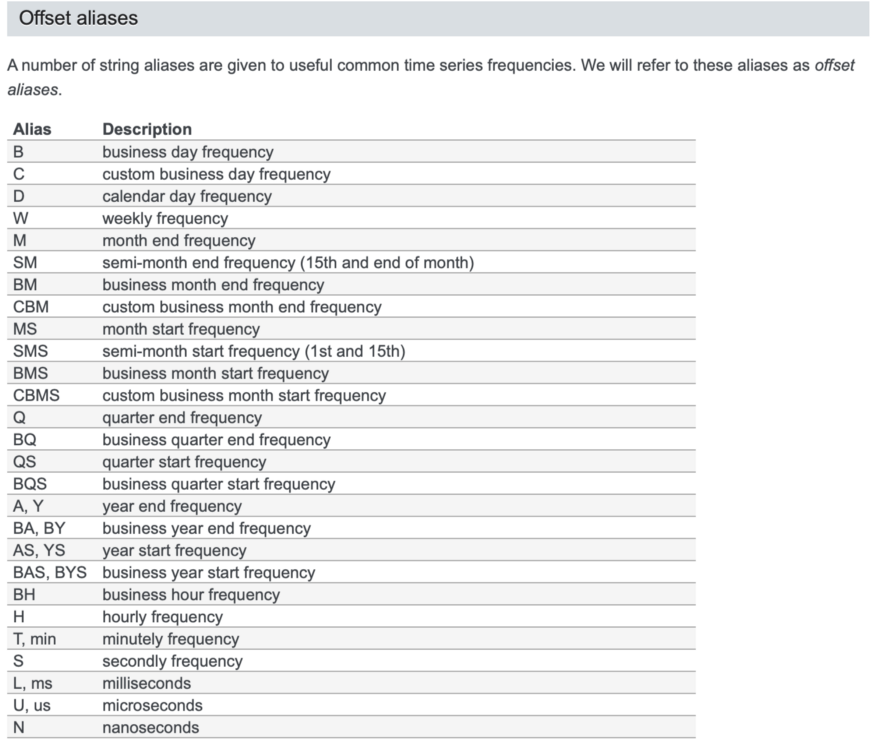


# Обработка данных перед построением стратегий


При работе с акциями 3 эшелона частно возникают проблемы - пропуски данных (сделки совершаются не каждый торговый день) и низкой ликвидности в те дни, когда сделки формально есть. Возможно, для сокращения торговых издержек такими акциями следует торговать реже и привести данные к недельному таймфрейму.

Последовательно обработку на примере неликвидных акций ТНС Энерго на Московской бирже


In [77]:
tnse = pd.read_excel("tnse.xlsx", index_col=0)
tnse


,ADMITTEDQUOTE,ADMITTEDVALUE,BEICLOSE,BID,BOARDID,BOARDNAME,BUYBACKDATE,CBRCLOSE,CLOSE,CLOSEAUCTIONPRICE,...,TRENDCLSPR,TRENDWAP,TRENDWAPPR,TYPE,VALUE,VOLUME,WAPRICE,WAVAL,YIELDLASTCOUPON,YIELDTOOFFER
TRADEDATE,,,,,,,,,,,,,,,,,,,,,
2019-05-02,1110,0,NaN,NaN,TQBR,NaN,NaN,NaN,1110.0,NaN,...,NaN,NaN,NaN,NaN,35520,32,1110.0,NaN,NaN,NaN
2019-05-03,1105,0,NaN,NaN,TQBR,NaN,NaN,NaN,1105.0,NaN,...,NaN,NaN,NaN,NaN,270860,245,1105.0,NaN,NaN,NaN
2019-05-06,1100,0,NaN,NaN,TQBR,NaN,NaN,NaN,1100.0,NaN,...,NaN,NaN,NaN,NaN,2200,2,1100.0,NaN,NaN,NaN
2019-05-07,1090,0,NaN,NaN,TQBR,NaN,NaN,NaN,1090.0,NaN,...,NaN,NaN,NaN,NaN,3270,3,1090.0,NaN,NaN,NaN
2019-05-08,1130,0,NaN,NaN,TQBR,NaN,NaN,NaN,1130.0,NaN,...,NaN,NaN,NaN,NaN,110375,98,1125.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-17,1070,0,NaN,NaN,TQBR,NaN,NaN,NaN,1070.0,NaN,...,NaN,NaN,NaN,NaN,7495,7,1070.0,NaN,NaN,NaN
2019-05-20,1070,0,NaN,NaN,TQBR,NaN,NaN,NaN,1070.0,NaN,...,NaN,NaN,NaN,NaN,7460,7,1065.0,NaN,NaN,NaN
2019-05-21,1070,0,NaN,NaN,TQBR,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN


Как видно из таблицы, еще одной проблемой низколиквидных акций является слабое наполнение отдельных столбцов и режима торгов. Оставим данные только по основному режиму торгов (TBQR) и отбросим внебиржевой рынок (MXBD) по столбцу BOARDID.

Также оставим только те столбцы, которые пригодятся в дальнейшей работе - CLOSE, VOLUME и WAPRICE


In [78]:
tnse_price = tnse.copy()

tnse_price = tnse_price[tnse_price["BOARDID"].str.contains("TQBR")][
    ["CLOSE", "VOLUME", "VALUE"]
]
tnse_price


,CLOSE,VOLUME,VALUE
TRADEDATE,,,
2019-05-02,1110.0,32,35520
2019-05-03,1105.0,245,270860
2019-05-06,1100.0,2,2200
2019-05-07,1090.0,3,3270
2019-05-08,1130.0,98,110375
...,...,...,...
2019-05-17,1070.0,7,7495
2019-05-20,1070.0,7,7460
2019-05-21,NaN,0,0


В некоторые дни по акциям не было сделок. Соответственно, цены закрытия по таким дням проставлены как NaN. Если требуется индикативная котировка для оценки теоретической стоимости портфеля, то можно предположить, что она равна котировки предыдущего торгового дня. Реализуем это через метод ffill:


In [79]:
tnse_price["CLOSE"] = tnse_price["CLOSE"].fillna(method="ffill")
tnse_price


,CLOSE,VOLUME,VALUE
TRADEDATE,,,
2019-05-02,1110.0,32,35520
2019-05-03,1105.0,245,270860
2019-05-06,1100.0,2,2200
2019-05-07,1090.0,3,3270
2019-05-08,1130.0,98,110375
...,...,...,...
2019-05-17,1070.0,7,7495
2019-05-20,1070.0,7,7460
2019-05-21,1070.0,0,0


Другим возможным вариантом является просто удаление таких дней, чтобы не мешались при проведении бэктеста. Также удалим те дни, где количество сделок было меньше 2 и объем торгов меньше 4000 рублей:


In [80]:
tnse_price.dropna(inplace=True)

tnse_liquid = tnse_price[(tnse_price["VOLUME"] > 2) & (tnse_price["VALUE"] > 4000)]
tnse_liquid


,CLOSE,VOLUME,VALUE
TRADEDATE,,,
2019-05-02,1110.0,32,35520
2019-05-03,1105.0,245,270860
2019-05-08,1130.0,98,110375
2019-05-13,1090.0,42,45905
2019-05-14,1070.0,357,390060
2019-05-15,1085.0,9,9805
2019-05-17,1070.0,7,7495
2019-05-20,1070.0,7,7460
2019-05-22,1055.0,468,493115


Совершать сделки по таким акциям каждый день не всегда возможно. Приведем их к недельному виду:


In [81]:
tnse_liquid.resample("W").agg({"CLOSE": "last", "VOLUME": "mean", "VALUE": "sum"})


,CLOSE,VOLUME,VALUE
TRADEDATE,,,
2019-05-05,1105.0,138.500000,306380
2019-05-12,1130.0,98.000000,110375
2019-05-19,1070.0,103.750000,453265
2019-05-26,1050.0,159.666667,504785


# 3 - Обработка данных с занятия по выгрузке данных


Загрузим датасет по ценам акций с NASDAQ


In [82]:
nasdaq = pd.read_csv("nasdaq_screener.csv")
nasdaq_tickets = nasdaq["Symbol"].tolist()
nasdaq_stocks = yf.download(
    tickers=nasdaq_tickets[:100], period="1y", interval="1d", group_by="ticker"
)
nasdaq_stocks.tail()


[*********************100%***********************]  100 of 100 completed

6 Failed downloads:
- ACEV: No data found, symbol may be delisted
- ADGI: No data found, symbol may be delisted
- ABTX: No data found, symbol may be delisted
- ACKIT: No data found, symbol may be delisted
- ACEVW: No data found, symbol may be delisted
- ACKIU: No data found, symbol may be delisted


ACEV                                  AACG              \
                    Open High Low Close Adj Close Volume  Open  High   Low   
Date                                                                         
2023-04-06 00:00:00  NaN  NaN NaN   NaN       NaN    NaN  1.87  1.90  1.81   
2023-04-10 00:00:00  NaN  NaN NaN   NaN       NaN    NaN  1.83  1.90  1.81   
2023-04-11 00:00:00  NaN  NaN NaN   NaN       NaN    NaN  1.90  1.97  1.85   
2023-04-12 00:00:00  NaN  NaN NaN   NaN       NaN    NaN  1.97  1.98  1.88   
2023-04-13 00:00:00  NaN  NaN NaN   NaN       NaN    NaN  1.94  1.95  1.89   

                           ...   ADTX                           ACAHU         \
                    Close  ...    Low   Close Adj Close Volume   Open   High   
Date                       ...                                                 
2023-04-06 00:00:00  1.84  ...  0.830  0.8630    0.8630  22500  10.16  10.16   
2023-04-10 00:00:00  1.83  ...  0.837  0.8780    0.8780  17300  10.10  10.11   
2023-04-11 00:00:00  1.97  ...  0.850  0.8900    0.8900  14700  10.11  10.11   
2023-04-12 00:00:00  1.88  ...  0.860  0.8600    0.8600  17000  10.11  10.11   
2023-04-13 00:00:00  1.90  ...  0.845  0.8453    0.8453  16015    NaN    NaN   

                                                     
                       Low  Close Adj Close  Volume  
Date                                                 
2023-04-06 00:00:00  10.16  10.16     10.16     0.0  
2023-04-10 00:00:00  10.10  10.11     10.11  4300.0  
2023-04-11 00:00:00  10.11  10.11     10.11     0.0  
2023-04-12 00:00:00  10.11  10.11     10.11     0.0  
2023-04-13 00:00:00    NaN    NaN       NaN     NaN  

[5 rows x 600 columns]

Создадим отдельную переменную с Adjusted Price:


In [83]:
nasdaq_adj_price = nasdaq_stocks.xs("Adj Close", level=1, axis=1)
nasdaq_adj_price.tail()


,ACEV,AACG,ADALU,ADIL,ADVM,ACHC,ACQRW,ABST,ADER,ACB,...,ADTN,ACBA,ABOS,ACCD,AATC,ADTH,ACIW,ACAHW,ADTX,ACAHU
Date,,,,,,,,,,,,,,,,,,,,,
2023-04-06 00:00:00,NaN,1.84,10.4500,0.30,0.6810,72.760002,NaN,8.29,10.44,0.6550,...,14.90,10.88,3.77,13.58,3.960,1.61,26.059999,NaN,0.8630,10.16
2023-04-10 00:00:00,NaN,1.83,10.4638,0.29,0.7200,73.269997,NaN,8.42,10.44,0.6600,...,15.11,10.88,3.83,13.51,3.940,1.59,26.120001,0.035,0.8780,10.11
2023-04-11 00:00:00,NaN,1.97,10.4600,0.28,0.7500,74.410004,NaN,8.18,10.45,0.6540,...,11.51,10.88,3.77,14.11,3.930,1.58,26.370001,NaN,0.8900,10.11
2023-04-12 00:00:00,NaN,1.88,10.4500,0.28,0.7500,74.199997,NaN,8.22,10.46,0.6510,...,10.60,10.88,3.85,14.25,3.910,1.58,25.639999,NaN,0.8600,10.11
2023-04-13 00:00:00,NaN,1.90,10.4400,0.30,0.8284,75.389999,NaN,8.76,10.48,0.6579,...,10.73,NaN,3.88,14.85,3.895,1.56,25.889999,NaN,0.8453,NaN


Сортируеми тикеры по алфавиту и удаляем пустые ряды для всех акций (обычно это праздники)


In [84]:
nasdaq_adj_price = nasdaq_adj_price.reindex(sorted(nasdaq_adj_price.columns), axis=1)
nasdaq_adj_price.tail()


,AACG,AACI,AACIW,AADI,AAL,AAME,AAOI,AAON,AAPL,AATC,...,ADSE,ADSEW,ADSK,ADTH,ADTHW,ADTN,ADTX,ADUS,ADV,ADVM
Date,,,,,,,,,,,,,,,,,,,,,
2023-04-06 00:00:00,1.84,10.1,NaN,7.10,14.01,2.42,2.14,92.750000,164.660004,3.960,...,2.3600,NaN,197.339996,1.61,NaN,14.90,0.8630,108.559998,1.58,0.6810
2023-04-10 00:00:00,1.83,10.1,NaN,7.21,14.15,2.48,2.22,94.260002,162.029999,3.940,...,2.5870,NaN,198.139999,1.59,0.1301,15.11,0.8780,110.940002,1.49,0.7200
2023-04-11 00:00:00,1.97,10.1,NaN,7.67,14.32,2.44,2.28,94.680000,160.800003,3.930,...,2.5800,NaN,197.779999,1.58,NaN,11.51,0.8900,112.139999,1.45,0.7500
2023-04-12 00:00:00,1.88,10.1,NaN,7.49,13.00,2.45,2.30,96.489998,160.100006,3.910,...,2.4500,NaN,193.160004,1.58,NaN,10.60,0.8600,112.220001,1.38,0.7500
2023-04-13 00:00:00,1.90,10.1,0.0991,8.13,12.95,2.47,2.23,97.120003,165.559998,3.895,...,2.3699,0.165,196.309998,1.56,NaN,10.73,0.8453,111.760002,1.37,0.8284


Пробуем отресэмплить дневные цены в месчные через last, но возникает ошибка


In [85]:
nasdaq_adj_price_monthly = nasdaq_adj_price.resample("M").last()
nasdaq_adj_price_monthly


TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

Причина в формате индекса


In [86]:
type(nasdaq_adj_price.index)


pandas.core.indexes.base.Index

In [87]:
nasdaq_adj_price.index = pd.to_datetime(nasdaq_adj_price.index)
type(nasdaq_adj_price.index)


pandas.core.indexes.datetimes.DatetimeIndex

In [88]:
nasdaq_adj_price_monthly = nasdaq_adj_price.resample("M").last()
nasdaq_adj_price_monthly


,AACG,AACI,AACIW,AADI,AAL,AAME,AAOI,AAON,AAPL,AATC,...,ADSE,ADSEW,ADSK,ADTH,ADTHW,ADTN,ADTX,ADUS,ADV,ADVM
Date,,,,,,,,,,,,,,,,,,,,,
2022-04-30,1.18,9.86,NaN,14.600000,18.770000,3.05,2.57,48.358391,156.700745,6.287561,...,6.7700,NaN,189.279999,8.65,NaN,17.076881,16.0000,84.279999,5.03,1.0700
2022-05-31,1.06,9.86,NaN,16.110001,17.870001,3.14,2.37,53.160496,148.161179,5.515318,...,6.1500,NaN,207.750000,9.41,NaN,18.285410,14.1500,83.500000,4.30,0.8970
2022-06-30,1.06,9.87,NaN,12.320000,12.680000,2.67,1.55,54.521820,136.096436,5.209972,...,6.6400,NaN,171.960007,3.09,NaN,17.298611,7.1500,83.279999,3.80,1.2000
2022-07-31,1.64,9.92,NaN,12.370000,13.710000,2.92,1.72,59.908291,161.768814,4.923710,...,7.2800,NaN,216.320007,2.81,NaN,23.772020,7.9000,92.809998,4.44,1.4600
2022-08-31,2.50,9.90,NaN,13.550000,12.990000,2.99,2.41,57.229992,156.720337,4.929523,...,8.0600,NaN,201.740005,2.64,NaN,23.016668,7.6500,89.220001,3.64,1.1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31,1.27,10.12,NaN,12.830000,12.720000,2.34,1.89,75.221939,129.731918,3.600000,...,3.1200,NaN,186.869995,1.66,NaN,18.689341,1.1550,99.489998,2.08,0.5800
2023-01-31,1.44,10.02,NaN,12.620000,16.139999,2.51,2.39,76.220634,144.070023,4.140000,...,3.0000,NaN,215.160004,1.74,NaN,18.768911,1.3600,107.519997,2.59,0.6510
2023-02-28,1.90,10.10,NaN,10.770000,15.980000,2.50,2.81,90.841576,147.410004,4.300000,...,2.9200,NaN,198.690002,1.52,NaN,17.356518,1.1300,108.639999,2.20,0.7200


Сохраняем файл в csv:


In [89]:
nasdaq_adj_price_monthly.to_csv("nasdaq_price.csv")


Возможно, в будущем нам потребуеются данные по среднедневному объему торгов в $. Для этого перемножаем объем в шт. акций с ценой для получения среднедневного объема торгов в валюте:


In [90]:
nasdaq_stocks_volume = nasdaq_stocks.xs("Volume", level=1, axis=1)
nasdaq_stocks_volume = nasdaq_stocks_volume.reindex(
    sorted(nasdaq_stocks_volume.columns), axis=1
)
nasdaq_dollars_volume = nasdaq_stocks_volume.mul(nasdaq_adj_price)
nasdaq_dollars_volume.tail()


,AACG,AACI,AACIW,AADI,AAL,AAME,AAOI,AAON,AAPL,AATC,...,ADSE,ADSEW,ADSK,ADTH,ADTHW,ADTN,ADTX,ADUS,ADV,ADVM
Date,,,,,,,,,,,,,,,,,,,,,
2023-04-06 00:00:00,18216.000330,0.000000,NaN,5.367600e+05,1.970787e+08,4356.000137,148730.007291,2.420775e+07,7.473934e+09,15048.000145,...,32331.998563,NaN,2.317758e+08,86940.000772,NaN,4.750120e+06,19417.499453,7.924880e+06,8.816400e+05,665677.494407
2023-04-10 00:00:00,32025.000751,13130.000496,NaN,1.005795e+06,2.664770e+08,5208.000040,139638.001800,4.069204e+07,7.731569e+09,17336.000252,...,16298.099327,NaN,2.130203e+08,110505.002320,75.457998,1.322578e+07,15189.400363,1.240309e+07,6.038821e+06,906048.036003
2023-04-11 00:00:00,17139.000249,91910.003471,NaN,9.457110e+05,2.508606e+08,1952.000046,157319.998026,2.925612e+07,7.661188e+09,27510.000467,...,13931.999588,NaN,1.964153e+08,130508.003545,NaN,6.613416e+07,13082.999790,6.077988e+06,5.482450e+05,72300.000000
2023-04-12 00:00:00,24439.999938,0.000000,NaN,6.591200e+05,1.260464e+09,23520.000458,242419.994974,2.062956e+07,8.026310e+09,7820.000172,...,17885.000348,NaN,3.513001e+08,81212.002206,NaN,3.140674e+07,14620.000243,6.138434e+06,5.139120e+05,125325.000000
2023-04-13 00:00:00,23917.199700,50712.101915,220.695703,1.092680e+06,6.060656e+08,25984.400301,223474.991911,2.880045e+07,1.066079e+10,21566.614894,...,19821.843501,4880.040194,3.191918e+08,285040.069545,NaN,1.810401e+07,13537.479801,1.497886e+07,7.750994e+05,613017.668515


Ресэмплим среднедневные данные объема торгов в месчные через mean и сохраняем файл:


In [91]:
nasdaq_dollars_volume.index = pd.to_datetime(nasdaq_dollars_volume.index)
nasdaq_mean_volume = nasdaq_dollars_volume.resample("M").mean()
nasdaq_mean_volume.to_csv("nasdaq_volume.csv")
nasdaq_mean_volume


,AACG,AACI,AACIW,AADI,AAL,AAME,AAOI,AAON,AAPL,AATC,...,ADSE,ADSEW,ADSK,ADTH,ADTHW,ADTN,ADTX,ADUS,ADV,ADVM
Date,,,,,,,,,,,,,,,,,,,,,
2022-04-30,17634.999854,3.424109e+04,NaN,1.304671e+06,7.711501e+08,17218.545777,737879.175305,1.325288e+07,1.457497e+10,99279.929690,...,151287.317038,NaN,3.034011e+08,8.779384e+05,NaN,5.747029e+06,9.277184e+04,5.472543e+06,3.075585e+06,8.304429e+05
2022-05-31,13965.428479,2.086814e+04,NaN,1.608009e+06,5.498094e+08,18424.809465,501285.659540,1.279813e+07,1.685855e+10,74422.693614,...,132982.190252,NaN,4.474142e+08,1.013577e+06,NaN,6.871259e+06,7.975703e+04,7.158642e+06,2.054427e+06,8.547928e+05
2022-06-30,8264.666530,3.691119e+05,NaN,3.147558e+06,5.367460e+08,21866.380894,515649.928046,9.371240e+06,1.151252e+10,39567.342215,...,318438.995972,NaN,3.101340e+08,2.229097e+06,NaN,6.922567e+06,8.132740e+05,5.697650e+06,2.008234e+06,1.642117e+06
2022-07-31,25202.699782,1.300471e+05,NaN,1.298184e+06,5.237118e+08,21241.100149,268368.998394,7.781355e+06,1.079789e+10,59701.175466,...,294653.500385,NaN,2.673514e+08,5.987808e+05,NaN,3.474320e+07,3.096490e+06,5.980303e+06,1.141483e+06,2.811541e+06
2022-08-31,172221.520265,4.690822e+04,NaN,1.555045e+06,3.622725e+08,30714.477886,727373.947228,8.223790e+06,1.090269e+10,94117.901808,...,149182.564339,NaN,2.892960e+08,6.965541e+05,NaN,1.538601e+07,2.530059e+05,6.722585e+06,1.356893e+06,7.428244e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31,14596.142865,3.734082e+04,NaN,1.127258e+06,3.309657e+08,13459.428641,336713.192298,1.518727e+07,1.095715e+10,209118.238187,...,214725.905016,NaN,2.605787e+08,1.392796e+05,NaN,9.967454e+06,1.140496e+05,9.699898e+06,1.039185e+06,4.344229e+05
2023-01-31,10395.550151,1.153721e+06,NaN,8.864592e+05,5.385264e+08,10625.299958,297434.949629,1.268428e+07,9.736781e+09,166500.200062,...,192111.877036,NaN,2.358206e+08,1.392029e+05,NaN,8.656072e+06,4.481078e+05,7.228196e+06,8.615726e+05,2.516011e+05
2023-02-28,58548.369362,4.420589e+05,NaN,1.555640e+06,3.265057e+08,10962.263282,644428.677294,2.235096e+07,1.040629e+10,42562.367896,...,154562.475693,NaN,3.324496e+08,2.047580e+05,NaN,1.181617e+07,1.983542e+05,1.017652e+07,1.126550e+06,1.835296e+05
